# 로지스틱 회귀 (이진분류)

시그모이드 함수(또는 로지스틱 함수) 사용하여 0과 1로 바꿈.
(무한하게 큰 음수가 될 경우 0, 무한하게 큰 양수가 될 경우 1로)

> 0~1 사이의 값을 0~100%까지의 확률로 해석할 수 있다. 

In [3]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import matplotlib.pyplot as plt

1. numpy를 이용하여 시그모이드 함수 구현하기

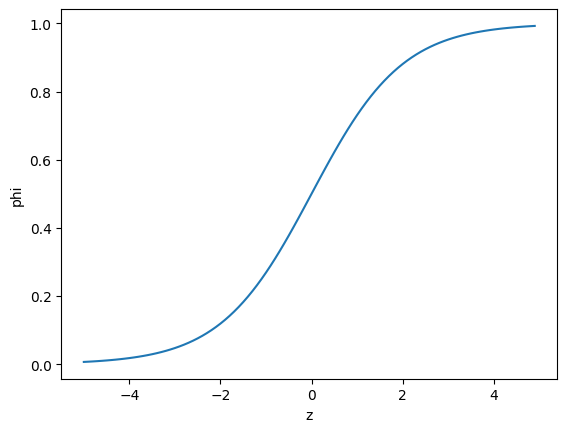

In [4]:
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


2. 시그모이드 함수를 이용하여 이진분류 - fish data 이용
- 데이터 불러오기 및 확인, 분할
> 0.5보다 작으면 0, 0.5보다 크면 1

In [5]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [6]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

array([[ 242.    ,   25.4   ,   30.    ,   11.52  ,    4.02  ],
       [ 290.    ,   26.3   ,   31.2   ,   12.48  ,    4.3056],
       [ 340.    ,   26.5   ,   31.1   ,   12.3778,    4.6961],
       [ 363.    ,   29.    ,   33.5   ,   12.73  ,    4.4555],
       [ 430.    ,   29.    ,   34.    ,   12.444 ,    5.134 ],
       [ 450.    ,   29.7   ,   34.7   ,   13.6024,    4.9274],
       [ 500.    ,   29.7   ,   34.5   ,   14.1795,    5.2785],
       [ 390.    ,   30.    ,   35.    ,   12.67  ,    4.69  ],
       [ 450.    ,   30.    ,   35.1   ,   14.0049,    4.8438],
       [ 500.    ,   30.7   ,   36.2   ,   14.2266,    4.9594],
       [ 475.    ,   31.    ,   36.2   ,   14.2628,    5.1042],
       [ 500.    ,   31.    ,   36.2   ,   14.3714,    4.8146],
       [ 500.    ,   31.5   ,   36.4   ,   13.7592,    4.368 ],
       [ 340.    ,   32.    ,   37.3   ,   13.9129,    5.0728],
       [ 600.    ,   32.    ,   37.2   ,   14.9544,    5.1708],
       [ 600.    ,   32.    ,   37.2   ,

In [8]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 불리언 인덱싱

# 1) 도미(bream) 와 빙어(smelt) 골라내기 
bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')
# 2) 도미와 빙어 훈련데이터 True 값
train_bream_smelt = train_scaled[bream_smelt_indexes]
# 3) 도미와 빙어 레이블 True 값
target_bream_smelt = train_target[bream_smelt_indexes]

3. 로지스틱회귀분석

- 1) 로지스틱회귀 학습 및 이진분류

In [12]:
from sklearn.linear_model import LogisticRegression

# 로지스틱회귀분석 객체 생성
lr = LogisticRegression()

# 훈련시키기
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [13]:
# 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [14]:
# 예측확률
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.997599 0.002401]
 [0.027352 0.972648]
 [0.994861 0.005139]
 [0.985842 0.014158]
 [0.997673 0.002327]]


> 음 , 양, 음, 음, 음

> 첫번째 열이 음성클래스(0)에 대한 확률, 두번째 열이 양성클래스(1)에 대한 확률

> Bream과 Smelt 중 어떤 것이 양성클래스인가? = classes_속성 확인해보기 (사이킷런은 타킷값을 알파벳순으로 정렬)

In [15]:
print(lr.classes_)

['Bream' 'Smelt']


> 음성클래스는 'Bream', 양성클래스는 'Smelt'

> 만약 도미(Bream)을 양성클래스로 사용하려면, Bream 값을 1로 만들고 Smelt값을 0으로 만들면 된다

- 2. 회귀계수 확인해보기

In [16]:
print(lr.coef_, lr.intercept_)

[[-0.40378  -0.576202 -0.662803 -1.012903 -0.731689]] [-2.161551]


> $z = -0.40378 * (Weight) -0.576202 * (Length)	-0.662803 * (Diagonal) -1.012903 * (Height) -0.731689 * (Width) -2.161551 $

- 3. 결과값(z) 확인해보기

In [17]:
# LogisticRegression 클래스는 decision_function() 메서드로 z값 출력 가능
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.029277  3.571239 -5.265689 -4.243218 -6.060712]


> 해석 : 음성클래스, 양성클래스, 음성클래스, 음성클래스, 음성클래스

In [18]:
# scipy를 이용하여 시그모이드 함수 계산할 수 있다.
from scipy.special import expit
print(expit(decisions))

[0.002401 0.972648 0.005139 0.014158 0.002327]


> 해석 : 양성클래스, 양성클래스, 양성클래스, 양성클래스, 양성클래스

***********

# 로지스틱회귀(다중분류)
 LogisticRegression은 제곱을 규제(L2규제) <-> Ridge함수(L1규제)

 ### 소프트맥스 함수
- 여러개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1이 되도록 (지수함수 사용하기 때문에 정규화된 지수함수라고도 한다.)


1. 로지스틱회귀 객체 만들기 및 분석

In [19]:
# C는 매개변수 : 기본값1, 작을수록 규제가 커진다 (<-> alpha 매개변수 : 클수록 규제가 커진다.)
# max_iter 반복횟수

# 객체
lr = LogisticRegression(C=20, max_iter=1000)

# 훈련
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


> 훈련과 검증데이터간 차이가 크지 않은 것으로 보아 과대적합,과소적합 X

2. 검증 데이터 예측값 생성

In [20]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [22]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [21]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) # 소수점 3자리까지

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


> 첫번째 샘플은 84%로 Perch 예측

3. 회귀식

In [23]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


4. 소프트맥스 함수 이해하기

- $z1~z7$ 까지 값 생성

In [24]:
# decision_Funtion을 이용해 Z1~Z7 값 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


- 지수로 표현하기 $e^z1 ~ e^z7$ => $esum = 1$

- s1= e^z1/esum ... 

5. scipy를 이용하여 소프트맥스함수 이해하기

In [25]:
from scipy.special import softmax
proba = softmax(decision, axis=1) #axis = 소프트맥스로 계산할 축 지정하기
print(np.round(proba, 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


> 앞서 구한 proba 배열과 일치 = 로지스틱 회귀 모델 성공적.

**********

# 로지스틱회귀

In [29]:
# 로지스틱 회귀

## 럭키백의 확률

### 데이터 준비하기

import pandas as pd
import numpy as np
np.set_printoptions(precision=6, suppress=True)

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [30]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [32]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_input

array([[ 242.    ,   25.4   ,   30.    ,   11.52  ,    4.02  ],
       [ 290.    ,   26.3   ,   31.2   ,   12.48  ,    4.3056],
       [ 340.    ,   26.5   ,   31.1   ,   12.3778,    4.6961],
       [ 363.    ,   29.    ,   33.5   ,   12.73  ,    4.4555],
       [ 430.    ,   29.    ,   34.    ,   12.444 ,    5.134 ],
       [ 450.    ,   29.7   ,   34.7   ,   13.6024,    4.9274],
       [ 500.    ,   29.7   ,   34.5   ,   14.1795,    5.2785],
       [ 390.    ,   30.    ,   35.    ,   12.67  ,    4.69  ],
       [ 450.    ,   30.    ,   35.1   ,   14.0049,    4.8438],
       [ 500.    ,   30.7   ,   36.2   ,   14.2266,    4.9594],
       [ 475.    ,   31.    ,   36.2   ,   14.2628,    5.1042],
       [ 500.    ,   31.    ,   36.2   ,   14.3714,    4.8146],
       [ 500.    ,   31.5   ,   36.4   ,   13.7592,    4.368 ],
       [ 340.    ,   32.    ,   37.3   ,   13.9129,    5.0728],
       [ 600.    ,   32.    ,   37.2   ,   14.9544,    5.1708],
       [ 600.    ,   32.    ,   37.2   ,

In [33]:
fish_target = fish['Species'].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [34]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

### 이진분류

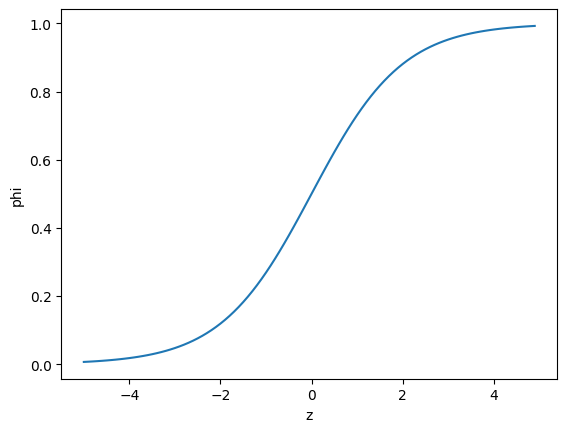

In [37]:
## 로지스틱 회귀##
import numpy as np
import matplotlib.pyplot as plt

# 시그모이드 함수 구현
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()